## KNN

Let’s go **from intuition → math → how it “learns” → when to use it**, in a way that actually sticks.

---

## 1. What is KNN (in plain English)

**K-Nearest Neighbors (KNN)** is a *similarity-based* algorithm.

> **“Show me the K most similar past examples, and I’ll decide based on them.”**

There is:

* ❌ No formula learned
* ❌ No training in the traditional sense
* ✅ Only comparison

That’s why KNN is called a **lazy learning algorithm**.

---

## 2. Core intuition (human analogy)

Imagine you want to predict:

> “Will this person buy my product?”

You look at:

* People **most similar** to them (age, income, behavior)
* If most of those people bought → **predict YES**
* If most didn’t → **predict NO**

That’s **exactly KNN**.

---

## 3. What “K” means

* **K = number of neighbors**
* You don’t look at *everyone*
* You only look at the **K closest data points**

Example:

* K = 3 → look at 3 closest points
* K = 7 → look at 7 closest points

### Why not K = 1?

Too noisy (one bad neighbor = wrong decision)

### Why not very large K?

Too generic (loses local patterns)

---

## 4. How KNN works (step-by-step)

Assume we have data:

| Person | Age | Income | Bought |
| ------ | --- | ------ | ------ |
| A      | 25  | 30k    | No     |
| B      | 27  | 35k    | No     |
| C      | 45  | 80k    | Yes    |
| D      | 50  | 90k    | Yes    |

Now a **new person**:

* Age = 48
* Income = 85k

### Step 1: Measure distance

Compute **distance** from new point to every data point.

Most common:

* **Euclidean distance**

[
\text{distance} = \sqrt{(x_1-x_2)^2 + (y_1-y_2)^2}
]

Closest points:

* C (Yes)
* D (Yes)

### Step 2: Pick K nearest neighbors

Let’s say **K = 3**

Neighbors:

* C → Yes
* D → Yes
* B → No

### Step 3: Vote

* Yes = 2
* No = 1

➡️ **Prediction = YES**

---

## 5. How does KNN “learn”?

**It doesn’t.**

No:

* gradient descent
* loss minimization
* weights
* parameters

### “Learning” = storing data

Training = **memorizing the dataset**

Prediction time is when all the work happens.

That’s why:

* Training is fast
* Prediction is slow

---

## 6. KNN for regression vs classification

### 🔹 Classification (most common)

* Output: **class**
* Decision: **majority vote**

Example:

* Spam / Not spam
* Buy / Not buy

---

### 🔹 Regression

* Output: **number**
* Decision: **average of neighbors**

Example:
Predict house price:

Neighbors prices:

* 50k
* 55k
* 60k

[
\text{Prediction} = \frac{50 + 55 + 60}{3} = 55k
]

---

## 7. Distance matters (VERY IMPORTANT)

KNN is **distance-based**, so:

### ❌ Problem: Different scales

* Age: 20–60
* Income: 20,000–1,000,000

Income dominates distance.

### ✅ Solution: Feature scaling

Always use:

* StandardScaler
* MinMaxScaler

**Rule:**

> ❗ Never use KNN without scaling

---

## 8. Choosing the right K

### Small K

* Low bias
* High variance
* Sensitive to noise

### Large K

* High bias
* Low variance
* Smooth but less accurate locally

### Best practice

* Try many K values
* Use **cross-validation**

Typical K range:

* 3–15 for small datasets
* √n as rough heuristic

---

## 9. Time & space complexity

| Phase      | Cost     |
| ---------- | -------- |
| Training   | O(1)     |
| Prediction | O(n × d) |
| Memory     | High     |

Where:

* n = number of samples
* d = number of features

👉 KNN **does not scale well** for large datasets.

---

## 10. When KNN is the BEST choice

### ✅ Use KNN when:

* Dataset is **small to medium**
* Features are **meaningful geometrically**
* Decision boundary is **complex & local**
* You want a **baseline model**
* Data is **static** (not streaming)

### Great real-world uses:

* Recommendation systems (similar users/items)
* Image recognition (pixel similarity)
* Anomaly detection (far from neighbors)
* Pattern recognition
* Cold-start problems

---

## 11. When NOT to use KNN

❌ Large datasets
❌ High dimensional data (curse of dimensionality)
❌ Real-time predictions
❌ Noisy data
❌ Features with no geometric meaning

---

## 12. KNN vs Linear / Logistic Regression

| Aspect           | KNN  | Linear/Logistic     |
| ---------------- | ---- | ------------------- |
| Training         | None | Yes                 |
| Interpretability | Low  | High                |
| Speed (predict)  | Slow | Fast                |
| Non-linear       | Yes  | No (without tricks) |
| Scaling needed   | Yes  | Optional            |

---

## 13. Mental model (remember this)

> **KNN = “Tell me who you are closest to, and I’ll decide who you are.”**

No math learning.
Only **memory + distance + voting**.




In [ ]:
## Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
## Importing Dataset
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

In [ ]:
data.isnull().sum() 

In [ ]:
## traintest split
from sklearn.model_selection import train_test_split
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
## Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
## Model Building
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

In [ ]:
## prediction
y_pred = knn.predict(X_test)

In [ ]:
# Confusion Matrix
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

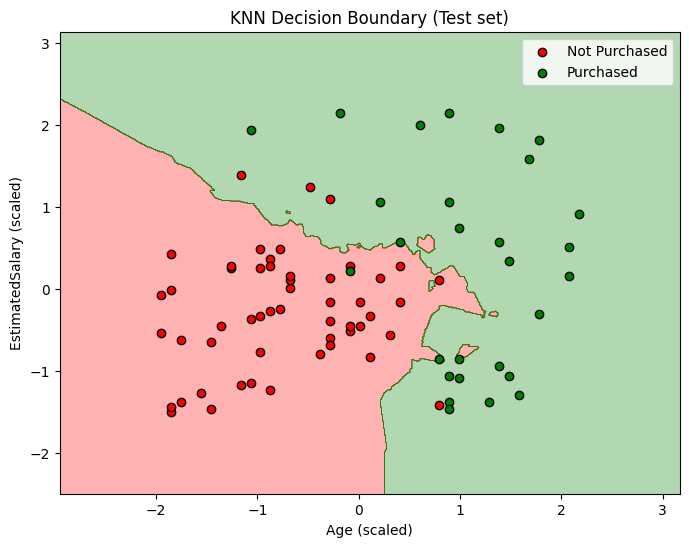

In [24]:
# Plot KNN decision boundary and test points
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Use the test set (X_test is scaled numpy array)
X_set = X_test
y_set = y_test.values if hasattr(y_test, 'values') else y_test

# Create meshgrid over feature space
x1_min, x1_max = X_set[:, 0].min() - 1, X_set[:, 0].max() + 1
x2_min, x2_max = X_set[:, 1].min() - 1, X_set[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                       np.arange(x2_min, x2_max, 0.01))

# Predict for each point on the grid
grid_points = np.c_[xx1.ravel(), xx2.ravel()]
Z = knn.predict(grid_points)
Z = Z.reshape(xx1.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=ListedColormap(('red', 'green')))

# Scatter test points with true labels
plt.scatter(X_set[y_set == 0, 0], X_set[y_set == 0, 1], c='red', edgecolor='k', label='Not Purchased')
plt.scatter(X_set[y_set == 1, 0], X_set[y_set == 1, 1], c='green', edgecolor='k', label='Purchased')

plt.title('KNN Decision Boundary (Test set)')
plt.xlabel('Age (scaled)')
plt.ylabel('EstimatedSalary (scaled)')
plt.legend()
plt.show()